In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy.optimize import curve_fit
from scipy.optimize import minimize
import warnings


#### https://stackoverflow.com/questions/51972637/nonlinear-regression-with-python-whats-a-simple-method-to-fit-this-data-bette 

## Script for fitting calibrated scores ##

### HPA ###

In [3]:
precision_HPA = pd.read_csv("../../Desktop/HPA_kegg-calibrated.tsv", sep='\t')
precision_HPA

,mean_score,precision,label
0,0.930552,0.9680,label
1,0.930531,0.9680,label
2,0.930510,0.9680,label
3,0.930490,0.9680,label
4,0.930469,0.9680,label
...,...,...,...
299600,0.500525,0.0688,label
299601,0.500525,0.0688,label
299602,0.500525,0.0688,label
299603,0.500525,0.0688,label


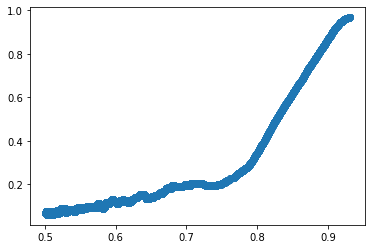

In [4]:
plt.scatter(precision_HPA['mean_score'], precision_HPA['precision'], alpha=0.5)
plt.show()

Parameters_HPA: [-0.22599286  0.5752701   1.         37.18051626  0.84454368]


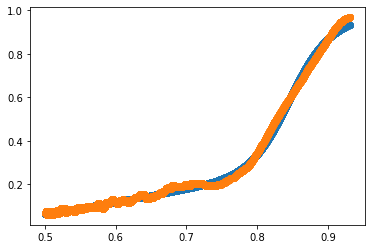

In [5]:
xData = precision_HPA['mean_score']
yData = precision_HPA['precision']


initial_guesses = [-0.5, 1.0, 0.7, 0.5, 0.85]

def func(x, a, a1, a2, a3, a4): # Sigmoid A With Offset from zunzun.com
    return  a + a1*x + (a2-a1-a)/(1+np.exp(-a3*(x-a4))) #a + a1*x + a2/(1+np.exp(-a3*(x-a4)))


# function for genetic algorithm to minimize (sum of squared error)
def objective(params):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *params)
    return np.sum((yData - val) ** 2.0) # the squared error between the fit and the points


def generate_Initial_Parameters():
    parameterBounds = []
    parameterBounds.append([None, None]) # search bounds for a
    parameterBounds.append([None, None]) # search bounds for a1
    parameterBounds.append([None, 1]) # search bounds for a2
    parameterBounds.append([None, None]) # search bounds for a3
    parameterBounds.append([None, None]) # search bounds for a4
    result = minimize(fun = objective, 
                      x0 = initial_guesses,
                      method='SLSQP',
                      bounds=parameterBounds,
                      options = {'maxiter': 1000})    
    return result.x

# generate initial parameter values
Parameters_HPA = generate_Initial_Parameters()
print("Parameters_HPA:",Parameters_HPA)


Y = []
for x in precision_HPA['mean_score']:
#     y = Parameters_HPA[0] + Parameters_HPA[1]*x + Parameters_HPA[2]/(1+np.exp(-Parameters_HPA[3]*(x-Parameters_HPA[4])))
    y = Parameters_HPA[0] + Parameters_HPA[1]*x + (Parameters_HPA[2]-Parameters_HPA[1]-Parameters_HPA[0])/(1+np.exp(-Parameters_HPA[3]*(x-Parameters_HPA[4])))
    Y.append(y)
    

plt.scatter(precision_HPA['mean_score'], Y, alpha=0.5)
plt.scatter(precision_HPA['mean_score'], precision_HPA['precision'],  alpha=0.5)
plt.show()

### Fit in the function the correlation network (scores directly from PCC not benchmark) ###

In [ ]:
HPA_net = pd.read_csv("Networks/HPA_TissueType_correlation_df_HPA_NO_DUPLICATES.tsv", sep = " ", header = None)


In [ ]:
STRING_conf_HPA = []
for x in HPA_net.iloc[:,2]:
    y = Parameters_HPA[0] + Parameters_HPA[1]*x + (Parameters_HPA[2]-Parameters_HPA[1]-Parameters_HPA[0])/(1+np.exp(-Parameters_HPA[3]*(x-Parameters_HPA[4])))
    STRING_conf_HPA.append(y)
 

In [ ]:
STRING_conf_HPA = pd.DataFrame(STRING_conf_HPA)
STRING_conf_HPA_pairs = pd.concat([HPA_net.iloc[:,:2], STRING_conf_HPA], axis = 1)
STRING_conf_HPA_pairs

In [ ]:
np.savetxt(r'/Users/tgn531/Desktop/fava/Networks/fitted_correlation_df_HPA.tsv', STRING_conf_HPA_pairs, fmt='%s')

### Fit HPA with ENGs

In [13]:
HPA_ENSGs = pd.read_csv("FAVA_networks/HPA_perTissue_ENSGs_correlation.tsv", sep = " ", header = None)

In [14]:
HPA_ENSGs

,0,1,2
0,ENSG00000198712,ENSG00000198804,0.987090
1,ENSG00000198804,ENSG00000198712,0.987090
2,ENSG00000198712,ENSG00000198938,0.986636
3,ENSG00000198938,ENSG00000198712,0.986636
4,ENSG00000198804,ENSG00000198938,0.985778
...,...,...,...
403588005,ENSG00000283967,ENSG00000122566,-0.392010
403588006,ENSG00000122566,ENSG00000232030,-0.392155
403588007,ENSG00000232030,ENSG00000122566,-0.392155
403588008,ENSG00000122566,ENSG00000288646,-0.393296


In [15]:
STRING_conf_HPA = []
for x in HPA_ENSGs.iloc[:,2]:
    y = Parameters_HPA[0] + Parameters_HPA[1]*x + (Parameters_HPA[2]-Parameters_HPA[1]-Parameters_HPA[0])/(1+np.exp(-Parameters_HPA[3]*(x-Parameters_HPA[4])))
    STRING_conf_HPA.append(y)
 

In [16]:
STRING_conf_HPA = pd.DataFrame(STRING_conf_HPA)
STRING_conf_HPA_pairs = pd.concat([HPA_ENSGs.iloc[:,:2], STRING_conf_HPA], axis = 1)
STRING_conf_HPA_pairs

,0,1,0
0,ENSG00000198712,ENSG00000198804,0.989341
1,ENSG00000198804,ENSG00000198712,0.989341
2,ENSG00000198712,ENSG00000198938,0.989025
3,ENSG00000198938,ENSG00000198712,0.989025
4,ENSG00000198804,ENSG00000198938,0.988426
...,...,...,...
403588005,ENSG00000283967,ENSG00000122566,-0.451504
403588006,ENSG00000122566,ENSG00000232030,-0.451588
403588007,ENSG00000232030,ENSG00000122566,-0.451588
403588008,ENSG00000122566,ENSG00000288646,-0.452244


In [17]:
np.savetxt(r'/Users/tgn531/Desktop/fava/FAVA_networks/ENSGs_fitted_correlation_HPA_perTissue.tsv', STRING_conf_HPA_pairs, fmt='%s')

### PRIDE ###

In [ ]:
precision_PRIDE = pd.read_csv("../../Desktop/Pride_kegg-calibrated.tsv", sep='\t')
precision_PRIDE

In [ ]:
plt.scatter(precision_PRIDE['mean_score'], precision_PRIDE['precision'], alpha=0.5)
plt.show()

In [ ]:
xData = precision_PRIDE['mean_score']
yData = precision_PRIDE['precision']


initial_guesses = [-0.5, 1.0, 0.7, 0.5, 0.85]

def func(x, a, a1, a2, a3, a4): # Sigmoid A With Offset from zunzun.com
    return  a + a1*x + (a2-a1-a)/(1+np.exp(-a3*(x-a4))) #a + a1*x + a2/(1+np.exp(-a3*(x-a4)))


# function for genetic algorithm to minimize (sum of squared error)
def objective(params):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *params)
    return np.sum((yData - val) ** 2.0) # the squared error between the fit and the points


def generate_Initial_Parameters():
    parameterBounds = []
    parameterBounds.append([None, None]) # search bounds for a
    parameterBounds.append([None, None]) # search bounds for a1
    parameterBounds.append([None, 1]) # search bounds for a2
    parameterBounds.append([None, None]) # search bounds for a3
    parameterBounds.append([None, None]) # search bounds for a4
    result = minimize(fun = objective, 
                      x0 = initial_guesses,
                      method='SLSQP',
                      bounds=parameterBounds,
                      options = {'maxiter': 1000})       
    return result.x

# generate initial parameter values
Parameters_PRIDE = generate_Initial_Parameters()
print("Parameters_PRIDE:",Parameters_PRIDE)


Y = []
for x in precision_PRIDE['mean_score']:
#     y = Parameters_PRIDE[0] + Parameters_PRIDE[1]*x + Parameters_PRIDE[2]/(1+np.exp(-Parameters_PRIDE[3]*(x-Parameters_PRIDE[4])))
    y = Parameters_PRIDE[0] + Parameters_PRIDE[1]*x + (Parameters_PRIDE[2]-Parameters_PRIDE[1]-Parameters_PRIDE[0])/(1+np.exp(-Parameters_PRIDE[3]*(x-Parameters_PRIDE[4])))    
    Y.append(y)
    

plt.scatter(precision_PRIDE['mean_score'], Y, alpha=0.5)
plt.scatter(precision_PRIDE['mean_score'], precision_PRIDE['precision'],  alpha=0.5)
plt.show()

In [ ]:
Pride_net = pd.read_csv("Networks/PRIDE_network_20220210_Pride_by_run_correlation_thrsh04_tab.tsv", sep = "\t", header=None)


In [ ]:
STRING_conf_PRIDE = []
for x in Pride_net.iloc[:,2]:
    y = Parameters_PRIDE[0] + Parameters_PRIDE[1]*x + (Parameters_PRIDE[2]-Parameters_PRIDE[1]-Parameters_PRIDE[0])/(1+np.exp(-Parameters_PRIDE[3]*(x-Parameters_PRIDE[4])))    
    STRING_conf_PRIDE.append(y)
    



In [ ]:
STRING_conf_PRIDE = pd.DataFrame(STRING_conf_PRIDE)
STRING_conf_PRIDE_pairs = pd.concat([Pride_net.iloc[:,:2], STRING_conf_PRIDE], axis = 1)
STRING_conf_PRIDE_pairs

In [ ]:
np.savetxt(r'/Users/tgn531/Desktop/fava/Networks/fitted_correlation_df_PRIDE.tsv', STRING_conf_PRIDE_pairs, fmt='%s')

# Comparison of Fava vs HuRI Networks #

#### STRING Identifiers ####

In [2]:
string_ids = pd.read_csv("Networks/9606.protein.aliases.v11.0.txt", sep ='\t', header=None)
string_ids

,0,1,2
0,9606.ENSP00000304353,0610037N12Rik,BLAST_KEGG_NAME_SYNONYM Ensembl_EntrezGene_syn...
1,9606.ENSP00000467262,0710008D09Rik,BLAST_KEGG_NAME_SYNONYM Ensembl_EntrezGene_syn...
2,9606.ENSP00000281456,1,Ensembl_EntrezGene_synonym
3,9606.ENSP00000324944,1,Ensembl_EntrezGene_synonym
4,9606.ENSP00000363092,1,Ensembl_EntrezGene_synonym
...,...,...,...
2224808,9606.ENSP00000359837,ZZZ3-011,Ensembl_HGNC_trans_name Ensembl_UniProt Ensemb...
2224809,9606.ENSP00000359837,ZZZ3_HUMAN,BLAST_UniProt_ID Ensembl_HGNC_UniProt_ID(suppl...
2224810,9606.ENSP00000371051,ZZZ4,BLAST_KEGG_NAME_SYNONYM Ensembl_EntrezGene_syn...
2224811,9606.ENSP00000426103,ZZZ5,Ensembl_EntrezGene_synonym Ensembl_HGNC_Synony...


#### HuRI Network and apply STRING IDs ####

In [3]:
huri = pd.read_csv("Networks/HuRI.tsv", sep = '\t', header = None)
huri


,0,1
0,ENSG00000000005,ENSG00000061656
1,ENSG00000000005,ENSG00000099968
2,ENSG00000000005,ENSG00000104765
3,ENSG00000000005,ENSG00000105383
4,ENSG00000000005,ENSG00000114455
...,...,...
52543,ENSG00000273899,ENSG00000273899
52544,ENSG00000275302,ENSG00000278619
52545,ENSG00000275774,ENSG00000275774
52546,ENSG00000276070,ENSG00000278619


In [4]:
import csv

dict = {}
with open("Networks/9606.protein.aliases.v11.0.txt") as f:
    for line in f:
        a = line.split("\t")
        dict[a[1]] = a[0]

identifiers = []
identifiers = [dict.get(key) for key in huri.iloc[:,1]]

identifiers = pd.DataFrame(identifiers)
# identifiers
huri_string_ids = pd.DataFrame.merge(identifiers, huri, left_index=True, right_index=True)
huri_string_ids
# np.savetxt(r'fetal_gene_expression_identifiers_rows.tsv', identifiers, fmt='%s')


,0_x,0_y,1
0,9606.ENSP00000363391,ENSG00000000005,ENSG00000061656
1,9606.ENSP00000480836,ENSG00000000005,ENSG00000099968
2,9606.ENSP00000370003,ENSG00000000005,ENSG00000104765
3,9606.ENSP00000262262,ENSG00000000005,ENSG00000105383
4,9606.ENSP00000350402,ENSG00000000005,ENSG00000114455
...,...,...,...
52543,9606.ENSP00000352021,ENSG00000273899,ENSG00000273899
52544,9606.ENSP00000481559,ENSG00000275302,ENSG00000278619
52545,9606.ENSP00000485450,ENSG00000275774,ENSG00000275774
52546,9606.ENSP00000481559,ENSG00000276070,ENSG00000278619


In [5]:
dict = {}
with open("Networks/9606.protein.aliases.v11.0.txt") as f:
    for line in f:
        a = line.split("\t")
        dict[a[1]] = a[0]

identifiers = []
identifiers = [dict.get(key) for key in huri.iloc[:,0]]

identifiers = pd.DataFrame(identifiers)
# identifiers
huri_string_ids = pd.DataFrame.merge(identifiers, huri_string_ids, left_index=True, right_index=True)
huri_string_ids

,0,0_x,0_y,1
0,9606.ENSP00000362122,9606.ENSP00000363391,ENSG00000000005,ENSG00000061656
1,9606.ENSP00000362122,9606.ENSP00000480836,ENSG00000000005,ENSG00000099968
2,9606.ENSP00000362122,9606.ENSP00000370003,ENSG00000000005,ENSG00000104765
3,9606.ENSP00000362122,9606.ENSP00000262262,ENSG00000000005,ENSG00000105383
4,9606.ENSP00000362122,9606.ENSP00000350402,ENSG00000000005,ENSG00000114455
...,...,...,...,...
52543,9606.ENSP00000352021,9606.ENSP00000352021,ENSG00000273899,ENSG00000273899
52544,9606.ENSP00000482259,9606.ENSP00000481559,ENSG00000275302,ENSG00000278619
52545,9606.ENSP00000485450,9606.ENSP00000485450,ENSG00000275774,ENSG00000275774
52546,9606.ENSP00000483609,9606.ENSP00000481559,ENSG00000276070,ENSG00000278619


In [6]:
huri_string_ids = huri_string_ids.iloc[:,0:2]
huri_string_ids = huri_string_ids.dropna(axis=0, how='any')
huri_string_ids

,0,0_x
0,9606.ENSP00000362122,9606.ENSP00000363391
1,9606.ENSP00000362122,9606.ENSP00000480836
2,9606.ENSP00000362122,9606.ENSP00000370003
3,9606.ENSP00000362122,9606.ENSP00000262262
4,9606.ENSP00000362122,9606.ENSP00000350402
...,...,...
52543,9606.ENSP00000352021,9606.ENSP00000352021
52544,9606.ENSP00000482259,9606.ENSP00000481559
52545,9606.ENSP00000485450,9606.ENSP00000485450
52546,9606.ENSP00000483609,9606.ENSP00000481559


In [124]:
huri_string_ids.to_csv("Networks/huri_string_ids.tsv",sep='\t', header=None, index=None)

#### Fava Networks ####

In [8]:
fava_40 = pd.read_csv("Networks/FavaNet_40Percent.tsv", sep = '\t', header = None)
fava_40

,0,1,2
0,9606.ENSP00000364801,9606.ENSP00000364802,0.999238
1,9606.ENSP00000364802,9606.ENSP00000364801,0.999238
2,9606.ENSP00000272317,9606.ENSP00000388107,0.998675
3,9606.ENSP00000388107,9606.ENSP00000272317,0.998675
4,9606.ENSP00000349960,9606.ENSP00000458162,0.998643
...,...,...,...
105901,9606.ENSP00000267119,9606.ENSP00000251645,0.400007
105902,9606.ENSP00000350512,9606.ENSP00000414359,0.400004
105903,9606.ENSP00000414359,9606.ENSP00000350512,0.400004
105904,9606.ENSP00000294600,9606.ENSP00000312399,0.400002


In [9]:
fava_70 = pd.read_csv("Networks/FavaNet_70Percent.tsv", sep = '\t', header = None)
fava_70

,0,1,2
0,9606.ENSP00000364801,9606.ENSP00000364802,0.999238
1,9606.ENSP00000364802,9606.ENSP00000364801,0.999238
2,9606.ENSP00000272317,9606.ENSP00000388107,0.998675
3,9606.ENSP00000388107,9606.ENSP00000272317,0.998675
4,9606.ENSP00000349960,9606.ENSP00000458162,0.998643
...,...,...,...
24177,9606.ENSP00000379386,9606.ENSP00000362413,0.700036
24178,9606.ENSP00000356015,9606.ENSP00000367992,0.700014
24179,9606.ENSP00000367992,9606.ENSP00000356015,0.700014
24180,9606.ENSP00000349960,9606.ENSP00000360609,0.700005


#### The implementation phase of the IDG program will focus on elucidating the function of understudied proteins from three protein families; non-olfactory GPCRs, ion channels, and protein kinases. This page lists protein targets that have been identified by the IDG program for additional research. This page was last updated on June 11, 2019. ####
#### https://commonfund.nih.gov/idg/understudiedproteins ####

#### Tdarks - Understudied Proteins ####

In [10]:
TDLs = pd.read_csv("../CBPP_22012021/Lars_Lab/IDG_project/TCRD_TDLs.tsv", sep ='\t')
TDLs = TDLs[['UniProt','TDLv7.00']]
TDLs

,UniProt,TDLv7.00
0,P04217,Tbio
1,Q9NQ94,Tbio
2,P01023,Tbio
3,A8K2U0,Tbio
4,U3KPV4,Tdark
...,...,...
20406,Q9UHU1,Tdark
20407,Q9UI25,Tdark
20408,Q9UI54,Tdark
20409,Q9UI72,Tdark


In [11]:
Tdarks = TDLs[TDLs['TDLv7.00']=='Tdark']
Tdarks

,UniProt,TDLv7.00
4,U3KPV4,Tdark
10,Q6P093,Tdark
11,Q5VUY0,Tdark
12,Q5VUY2,Tdark
16,Q9H7C9,Tdark
...,...,...
20406,Q9UHU1,Tdark
20407,Q9UI25,Tdark
20408,Q9UI54,Tdark
20409,Q9UI72,Tdark


In [12]:
dict = {}
with open("Networks/9606.protein.aliases.v11.0.txt") as f:
    for line in f:
        a = line.split("\t")
        dict[a[1]] = a[0]

identifiers = []
identifiers = [dict.get(key) for key in Tdarks['UniProt']]

identifiers = pd.DataFrame(identifiers)
identifiers
# identifiers
Tdarks_string_ids = identifiers
Tdarks_string_ids

,0
0,9606.ENSP00000475261
1,9606.ENSP00000348911
2,9606.ENSP00000352268
3,9606.ENSP00000365395
4,9606.ENSP00000431808
...,...
5996,None
5997,None
5998,None
5999,None


In [13]:
Tdarks_string_ids = Tdarks_string_ids.dropna(axis=0, how='any')
Tdarks_string_ids = pd.DataFrame(np.unique(Tdarks_string_ids))
Tdarks_string_ids

,0
0,9606.ENSP00000005286
1,9606.ENSP00000006526
2,9606.ENSP00000006658
3,9606.ENSP00000007390
4,9606.ENSP00000007735
...,...
4721,9606.ENSP00000485629
4722,9606.ENSP00000485635
4723,9606.ENSP00000485638
4724,9606.ENSP00000485656


## Comparison of number of interactions for understudied proteins in HuRI & FAVA Networks ##

In [14]:
Tdarks_in_HuRI = []
for i in range(0, len(Tdarks_string_ids.iloc[:,0])):
    pair = huri_string_ids[huri_string_ids.iloc[:,0] == Tdarks_string_ids.iloc[i,0]]
    if not pair.empty:
        Tdarks_in_HuRI.append(pair)

Tdarks_in_HuRI

# huri_string_ids[huri_string_ids.iloc[:,0]=='9606.ENSP00000363391']

[                        0                   0_x
 521  9606.ENSP00000006526  9606.ENSP00000279206,
                          0                   0_x
 988   9606.ENSP00000008391  9606.ENSP00000380557
 989   9606.ENSP00000008391  9606.ENSP00000376035
 990   9606.ENSP00000008391  9606.ENSP00000064778
 991   9606.ENSP00000008391  9606.ENSP00000362994
 992   9606.ENSP00000008391  9606.ENSP00000361646
 ...                    ...                   ...
 1047  9606.ENSP00000008391  9606.ENSP00000344420
 1048  9606.ENSP00000008391  9606.ENSP00000366950
 1049  9606.ENSP00000008391  9606.ENSP00000334696
 1050  9606.ENSP00000008391  9606.ENSP00000476821
 1051  9606.ENSP00000008391  9606.ENSP00000479656
 
 [64 rows x 2 columns],
                          0                   0_x
 5604  9606.ENSP00000016913  9606.ENSP00000219207
 5605  9606.ENSP00000016913  9606.ENSP00000272462,
                          0                   0_x
 2371  9606.ENSP00000037869  9606.ENSP00000378414
 2372  9606.ENSP00000037

In [27]:
len(Tdarks_in_HuRI)

1162

#### Pubmed Hits <= 50 ####

In [32]:
Under_Prot_PubMed = pd.read_csv("Networks/understudied_proteins_lower_than_50hits_from_pubmed_with_ENSP_IDs.tsv",
                               header=None, sep='\t')
Under_Prot_PubMed

,0
0,9606.ENSP00000480445
1,9606.ENSP00000464265
2,9606.ENSP00000444628
3,9606.ENSP00000429240
4,9606.ENSP00000414330
...,...
2935,9606.ENSP00000290390
2936,9606.ENSP00000283225
2937,9606.ENSP00000274673
2938,9606.ENSP00000482437


In [50]:
huri_string_ids.columns = [''] * len(huri_string_ids.columns)
huri_string_ids

,,
0,9606.ENSP00000362122,9606.ENSP00000363391
1,9606.ENSP00000362122,9606.ENSP00000480836
2,9606.ENSP00000362122,9606.ENSP00000370003
3,9606.ENSP00000362122,9606.ENSP00000262262
4,9606.ENSP00000362122,9606.ENSP00000350402
...,...,...
52543,9606.ENSP00000352021,9606.ENSP00000352021
52544,9606.ENSP00000482259,9606.ENSP00000481559
52545,9606.ENSP00000485450,9606.ENSP00000485450
52546,9606.ENSP00000483609,9606.ENSP00000481559


In [117]:
Under_Prot_in_HuRI = []
for i in range(0, len(Under_Prot_PubMed.iloc[:,0])):
    pair = huri_string_ids[huri_string_ids.iloc[:,0] == Under_Prot_PubMed.iloc[i,0]]
    pair2 = huri_string_ids[huri_string_ids.iloc[:,1] == Under_Prot_PubMed.iloc[i,0]]
    if not pair.empty:
        Under_Prot_in_HuRI.append(pair)
    if not pair2.empty:
        Under_Prot_in_HuRI.append(pair2)

Under_Prot_in_HuRI = np.array(Under_Prot_in_HuRI, dtype=object)

Huri_interactions_for_understudied_prot = pd.DataFrame()
for i in range(len(Under_Prot_in_HuRI)):
    Huri_interactions_for_understudied_prot = pd.concat([Huri_interactions_for_understudied_prot, 
                                                         Under_Prot_in_HuRI[i]], axis = 0)
    
Huri_interactions_for_understudied_prot

,,
37666,9606.ENSP00000444628,9606.ENSP00000386453
5438,9606.ENSP00000381412,9606.ENSP00000444628
4874,9606.ENSP00000361646,9606.ENSP00000429240
34909,9606.ENSP00000269886,9606.ENSP00000429240
41121,9606.ENSP00000293230,9606.ENSP00000429240
...,...,...
44418,9606.ENSP00000199280,9606.ENSP00000311477
47643,9606.ENSP00000307951,9606.ENSP00000364180
38140,9606.ENSP00000281321,9606.ENSP00000307951
44661,9606.ENSP00000391227,9606.ENSP00000307951


### How many unique interactions in total for the understudied proteins ####

In [180]:
a = pd.DataFrame(Huri_interactions_for_understudied_prot.iloc[:,0].unique())
b = pd.DataFrame(Huri_interactions_for_understudied_prot.iloc[:,1].unique())

c = pd.concat([a,b], axis=0)
c = pd.DataFrame(c.iloc[:,0].unique())
# print(c)

x = []
for i in range(0, len(Under_Prot_PubMed.iloc[:,0])):
    prot = c[c.iloc[:,0] == Under_Prot_PubMed.iloc[i,0]]    
    if not prot.empty:
        x.append(prot)

xxx_huri = pd.DataFrame()
for i in range(len(x)):
    xxx_huri = pd.concat([xxx_huri, x[i]], axis = 0)

xxx_huri


,0
1708,9606.ENSP00000444628
3152,9606.ENSP00000429240
3067,9606.ENSP00000382507
1053,9606.ENSP00000404911
2120,9606.ENSP00000372445
...,...
57,9606.ENSP00000378760
2591,9606.ENSP00000315081
2464,9606.ENSP00000311477
2471,9606.ENSP00000307951


In [90]:
Under_Prot_in_FAVA = []
for i in range(0, len(Under_Prot_PubMed.iloc[:,0])):
    pair = fava_40[fava_40.iloc[:,0] == Under_Prot_PubMed.iloc[i,0]]
    if not pair.empty:
        Under_Prot_in_FAVA.append(pair)

Under_Prot_in_FAVA = np.array(Under_Prot_in_FAVA, dtype=object)


FAVA_interactions_for_understudied_prot = pd.DataFrame()
for i in range(len(Under_Prot_in_FAVA)):
    FAVA_interactions_for_understudied_prot = pd.concat([FAVA_interactions_for_understudied_prot, 
                                                         Under_Prot_in_FAVA[i]], axis = 0)
    
FAVA_interactions_for_understudied_prot

,0,1,2
64828,9606.ENSP00000410198,9606.ENSP00000471549,0.495101
9993,9606.ENSP00000354583,9606.ENSP00000322956,0.898641
85832,9606.ENSP00000326706,9606.ENSP00000368022,0.439396
3216,9606.ENSP00000318197,9606.ENSP00000333326,0.974475
3261,9606.ENSP00000318197,9606.ENSP00000248437,0.974031
...,...,...,...
103428,9606.ENSP00000303862,9606.ENSP00000331214,0.404463
103650,9606.ENSP00000303862,9606.ENSP00000348033,0.404102
105844,9606.ENSP00000303862,9606.ENSP00000431443,0.400134
65511,9606.ENSP00000283225,9606.ENSP00000267377,0.492959


### How many unique interactions in total for the understudied proteins ####

In [181]:
a = pd.DataFrame(FAVA_interactions_for_understudied_prot.iloc[:,0].unique())
b = pd.DataFrame(FAVA_interactions_for_understudied_prot.iloc[:,1].unique())

c = pd.concat([a,b], axis=0)
c = pd.DataFrame(c.iloc[:,0].unique())
# print(c)

x = []
for i in range(0, len(Under_Prot_PubMed.iloc[:,0])):
    prot = c[c.iloc[:,0] == Under_Prot_PubMed.iloc[i,0]]    
    if not prot.empty:
        x.append(prot)

xxx_fava = pd.DataFrame()
for i in range(len(x)):
    xxx_fava = pd.concat([xxx_fava, x[i]], axis = 0)

xxx_fava


,0
0,9606.ENSP00000410198
1,9606.ENSP00000354583
2,9606.ENSP00000326706
3,9606.ENSP00000318197
4,9606.ENSP00000315664
...,...
973,9606.ENSP00000306657
974,9606.ENSP00000304235
975,9606.ENSP00000303862
976,9606.ENSP00000283225


### Overlap HuRI & FAVA ###

In [195]:
# Huri_interactions_for_understudied_prot
# FAVA_interactions_for_understudied_prot_comparison

,A,B
0,9606.ENSP00000410198,9606.ENSP00000471549
1,9606.ENSP00000354583,9606.ENSP00000322956
2,9606.ENSP00000326706,9606.ENSP00000368022
3,9606.ENSP00000318197,9606.ENSP00000333326
4,9606.ENSP00000318197,9606.ENSP00000248437
...,...,...
19568,9606.ENSP00000303862,9606.ENSP00000331214
19569,9606.ENSP00000303862,9606.ENSP00000348033
19570,9606.ENSP00000303862,9606.ENSP00000431443
19571,9606.ENSP00000283225,9606.ENSP00000267377


In [175]:
# Total interactions with under.prot.

In [162]:
FAVA_interactions_for_understudied_prot_comparison = FAVA_interactions_for_understudied_prot.iloc[:,0:2]
FAVA_interactions_for_understudied_prot_comparison.columns = ['A','B']
Huri_interactions_for_understudied_prot.columns = ['A','B']

FAVA_interactions_for_understudied_prot_comparison = FAVA_interactions_for_understudied_prot_comparison.reset_index(drop=True)
Huri_interactions_for_understudied_prot = Huri_interactions_for_understudied_prot.reset_index(drop=True)

# FAVA_interactions_for_understudied_prot_comparison['comparison'] = (FAVA_interactions_for_understudied_prot_comparison[['A', 'B']] == Huri_interactions_for_understudied_prot).all(axis=1).astype(int)





In [174]:
df_comparison = pd.merge(FAVA_interactions_for_understudied_prot_comparison,
                  Huri_interactions_for_understudied_prot, how='inner')

df_comparison


,A,B
0,9606.ENSP00000357766,9606.ENSP00000357772
1,9606.ENSP00000357766,9606.ENSP00000357772
2,9606.ENSP00000357766,9606.ENSP00000353203
3,9606.ENSP00000257974,9606.ENSP00000366984
4,9606.ENSP00000448220,9606.ENSP00000246635
...,...,...
156,9606.ENSP00000381541,9606.ENSP00000417330
157,9606.ENSP00000381541,9606.ENSP00000417330
158,9606.ENSP00000438757,9606.ENSP00000404281
159,9606.ENSP00000381009,9606.ENSP00000476821


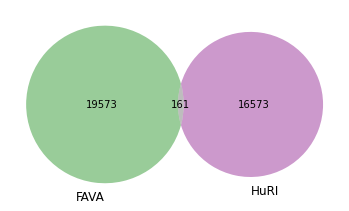

In [194]:
venn2(subsets = (len(FAVA_interactions_for_understudied_prot_comparison), len(Huri_interactions_for_understudied_prot),
                 len(df_comparison)), set_labels = ('FAVA', 'HuRI'),
      set_colors=('green','purple')
     )

In [ ]:
# Unique under.prot

In [182]:
df_comparison_uniq_under_prot = pd.merge(xxx_fava,
                  xxx_huri, how='inner')

df_comparison_uniq_under_prot

,0
0,9606.ENSP00000326706
1,9606.ENSP00000318197
2,9606.ENSP00000315664
3,9606.ENSP00000299732
4,9606.ENSP00000263095
...,...
363,9606.ENSP00000381009
364,9606.ENSP00000375476
365,9606.ENSP00000355651
366,9606.ENSP00000335567


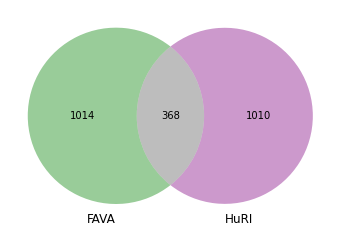

In [193]:
from matplotlib_venn import venn2
venn2(subsets = (len(xxx_fava), len(xxx_huri), len(df_comparison_uniq_under_prot)), set_labels = ('FAVA', 'HuRI'),
      set_colors=('green','purple')
     )

#### Fava total ####

In [121]:
fava = pd.read_csv("Networks/Fava_Network_SingleCells_Proteomics_CombinedScores_taxonID.tsv", sep = '\t', header = None)
fava


,0,1,2
0,9606.ENSP00000364801,9606.ENSP00000364802,0.999238
1,9606.ENSP00000364802,9606.ENSP00000364801,0.999238
2,9606.ENSP00000272317,9606.ENSP00000388107,0.998675
3,9606.ENSP00000388107,9606.ENSP00000272317,0.998675
4,9606.ENSP00000349960,9606.ENSP00000458162,0.998643
...,...,...,...
11968773,9606.ENSP00000417763,9606.ENSP00000354774,0.061644
11968774,9606.ENSP00000433126,9606.ENSP00000380336,0.061644
11968775,9606.ENSP00000437073,9606.ENSP00000332772,0.061644
11968776,9606.ENSP00000482229,9606.ENSP00000342499,0.061644


In [122]:
Under_Prot_in_FAVA_total = []
for i in range(0, len(Under_Prot_PubMed.iloc[:,0])):
    pair = fava[fava.iloc[:,0] == Under_Prot_PubMed.iloc[i,0]]
    if not pair.empty:
        Under_Prot_in_FAVA_total.append(pair)

Under_Prot_in_FAVA_total = np.array(Under_Prot_in_FAVA_total, dtype=object)


FAVA_total_interactions_for_understudied_prot = pd.DataFrame()
for i in range(len(Under_Prot_in_FAVA_total)):
    FAVA_total_interactions_for_understudied_prot = pd.concat([FAVA_total_interactions_for_understudied_prot, 
                                                         Under_Prot_in_FAVA_total[i]], axis = 0)
    
FAVA_total_interactions_for_understudied_prot

,0,1,2
879219,9606.ENSP00000480445,9606.ENSP00000378286,0.158516
1340293,9606.ENSP00000480445,9606.ENSP00000376989,0.136114
1674758,9606.ENSP00000480445,9606.ENSP00000386557,0.125910
1765031,9606.ENSP00000480445,9606.ENSP00000407422,0.123637
2016334,9606.ENSP00000480445,9606.ENSP00000272928,0.118053
...,...,...,...
11419203,9606.ENSP00000248058,9606.ENSP00000383225,0.063156
11428086,9606.ENSP00000248058,9606.ENSP00000386195,0.063136
11465274,9606.ENSP00000248058,9606.ENSP00000323612,0.063051
11621063,9606.ENSP00000248058,9606.ENSP00000341342,0.062702


In [1]:
## Gaussian distribution ##

In [3]:
import sklearn


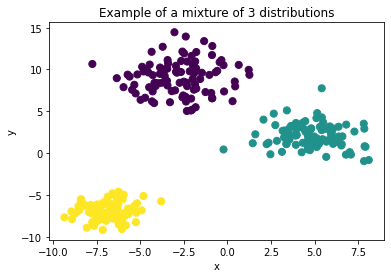

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets import make_blobs
n_components = 3
X, truth = make_blobs(n_samples=300, centers=n_components, 
                      cluster_std = [2, 1.5, 1], 
                      random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=50, c = truth)
plt.title(f"Example of a mixture of {n_components} distributions")
plt.xlabel("x")
plt.ylabel("y");

In [6]:
# Extract x and y
x = X[:, 0]
y = X[:, 1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

-11.097585529030251 9.858180523990058 -11.545696279950441 16.81828998331647


In [7]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

(-12.145373831681267,
 10.905968826641073,
 -12.963895593113786,
 18.236489296479814)

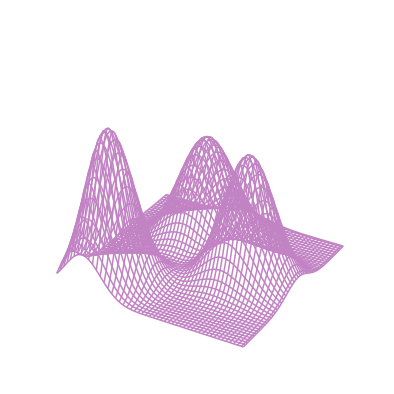

In [27]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
w = ax.plot_wireframe(xx, yy, f, color='#c183c3')
# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

fig.patch.set_visible(False)
ax.axis('off')